In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import time

In [2]:
seed=42

In [3]:
path = 'archive/asl_alphabet_train/asl_alphabet_train/'
for dire in sorted(os.listdir(path)):
    print(f'No. of images present in {dire}: {len(os.listdir(os.path.join(path,dire)))}')

No. of images present in A: 3000
No. of images present in B: 3000
No. of images present in C: 3000
No. of images present in D: 3000
No. of images present in E: 3000
No. of images present in F: 3000
No. of images present in G: 3000
No. of images present in H: 3000
No. of images present in I: 3000
No. of images present in J: 3000
No. of images present in K: 3000
No. of images present in L: 3000
No. of images present in M: 3000
No. of images present in N: 3000
No. of images present in O: 3000
No. of images present in P: 3000
No. of images present in Q: 3000
No. of images present in R: 3000
No. of images present in S: 3000
No. of images present in T: 3000
No. of images present in U: 3000
No. of images present in V: 3000
No. of images present in W: 3000
No. of images present in X: 3000
No. of images present in Y: 3000
No. of images present in Z: 3000
No. of images present in del: 3000
No. of images present in nothing: 3000
No. of images present in space: 3000


<ipython-input-4-303c058dc427>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


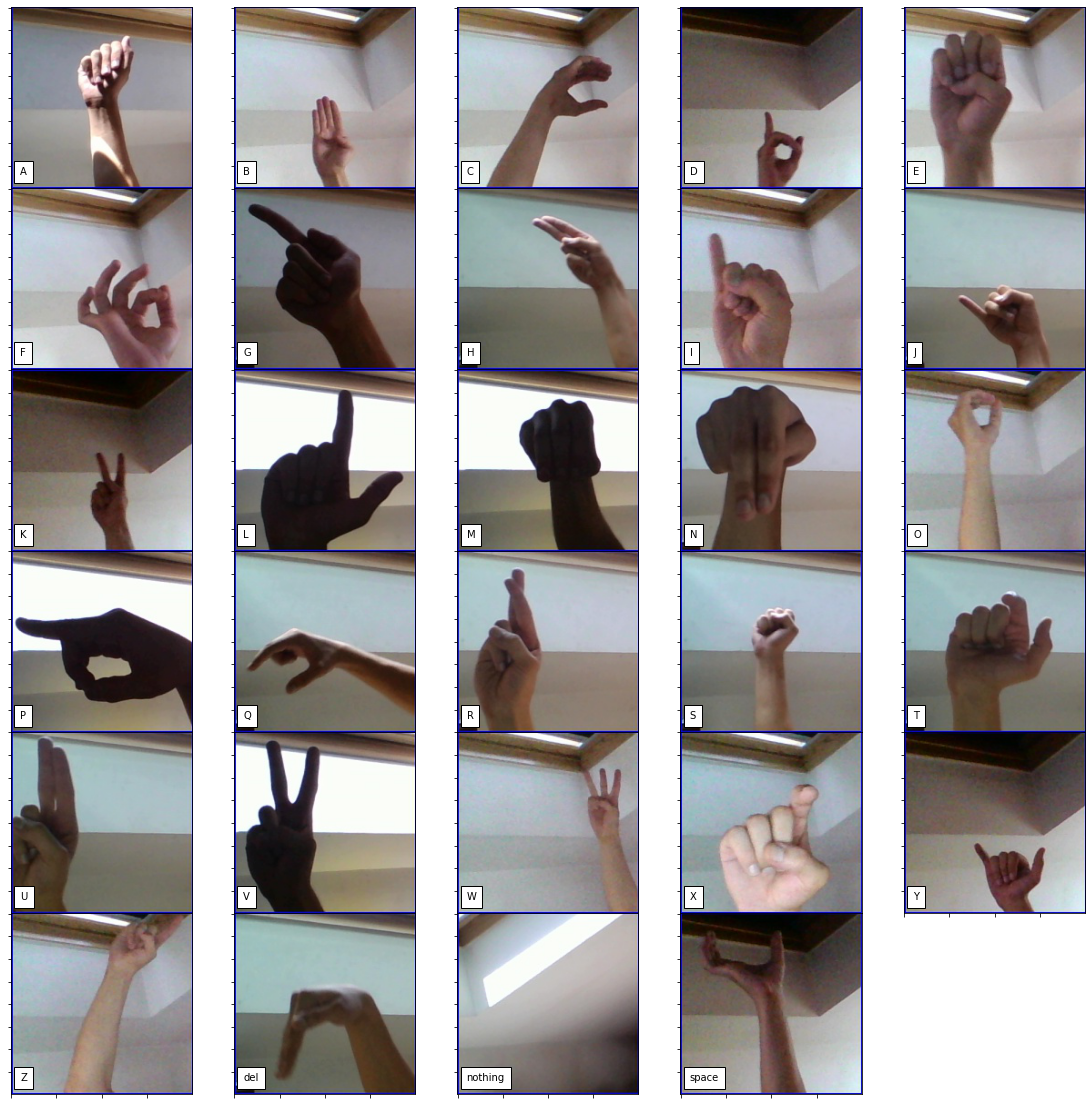

In [4]:
fig,ax = plt.subplots(6,5,figsize=(20,20))
i = 0
for dire in sorted(os.listdir(path)):
    imgPath = os.path.join(path,dire)
    jpg = np.random.choice(os.listdir(imgPath),size=1)[0]
    img = image.load_img(os.path.join(imgPath,jpg))
    ax[i//5][i%5].set_xticklabels([])
    ax[i//5][i%5].set_yticklabels([])
    ax[i//5][i%5].set_aspect('equal')
    ax[i//5][i%5].imshow(img)
    ax[i//5][i%5].text(10,185,f'{dire}',bbox={'facecolor': 'white', 'pad': 6})
    i += 1

ax[5][4].remove()
plt.subplots_adjust(wspace=0, hspace=0)
fig.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255,zoom_range=0.2, validation_split=0.2)

In [6]:
train =  train_gen.flow_from_directory(path,target_size=(128,128), subset='training', class_mode='categorical', batch_size=256)

Found 69600 images belonging to 29 classes.


In [7]:
val =  train_gen.flow_from_directory(path,target_size=(128,128), subset='validation', class_mode='categorical', batch_size=256)

Found 17400 images belonging to 29 classes.


In [8]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization, Flatten
from tensorflow.keras.regularizers import l2
model = tf.keras.Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=(128,128,3), activation='relu', kernel_regularizer=l2(.001)),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu',kernel_regularizer=l2(.0001)),
    MaxPool2D(2,2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(.0001)),
    MaxPool2D(2,2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(.0001)),
    MaxPool2D(2,2),
    Flatten(),
    Dropout(0.25),
    Dense(512, activation='relu', kernel_regularizer=l2(.0001)),
    BatchNormalization(),
    Dropout(0.25),
    Dense(256, activation='relu' ,kernel_regularizer=l2(.0001)),
    Dense(29, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
start = time.time()
hist = model.fit(train, validation_data=val, epochs=10)
end = time.time()

Epoch 1/10
272/272 [==============================] - 67s 227ms/step - loss: 1.4136 - accuracy: 0.6315 - val_loss: 1.6924 - val_accuracy: 0.6567
Epoch 2/10
272/272 [==============================] - 65s 226ms/step - loss: 0.3030 - accuracy: 0.9518 - val_loss: 1.0074 - val_accuracy: 0.7573
Epoch 3/10
272/272 [==============================] - 64s 229ms/step - loss: 0.1954 - accuracy: 0.9820 - val_loss: 1.3458 - val_accuracy: 0.7179
Epoch 4/10
272/272 [==============================] - 64s 228ms/step - loss: 0.1637 - accuracy: 0.9895 - val_loss: 1.2972 - val_accuracy: 0.7548
Epoch 5/10
272/272 [==============================] - 64s 227ms/step - loss: 0.1509 - accuracy: 0.9909 - val_loss: 1.2297 - val_accuracy: 0.7517
Epoch 6/10
272/272 [==============================] - 63s 225ms/step - loss: 0.1414 - accuracy: 0.9925 - val_loss: 0.9721 - val_accuracy: 0.7859
Epoch 7/10
272/272 [==============================] - 63s 226ms/step - loss: 0.1304 - accuracy: 0.9942 - val_loss: 1.0436 - val_ac

In [12]:
tot_time = end-start
print("total time to train: ", tot_time)

total time to train:  645.7864780426025


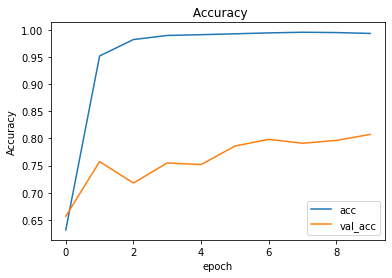

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title(' Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='lower right')

plt.show()

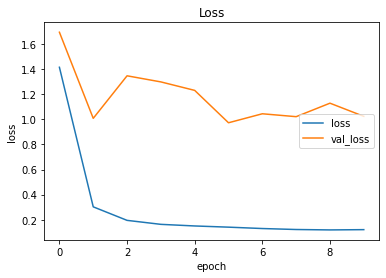

In [14]:
plt.plot(hist.history['loss'],)
plt.plot(hist.history['val_loss'])
plt.title('Loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='center right')


plt.show()

In [15]:
model.save('cnn_all.h5')

In [16]:
np.save('cnn_all.npy',hist.history)

In [17]:
test=np.load('cnn_all.npy',allow_pickle='TRUE').item()

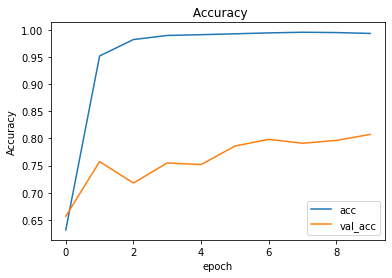

In [18]:
plt.plot(test['accuracy'])
plt.plot(test['val_accuracy'])
plt.title(' Accuracy')

plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='lower right')

plt.show()

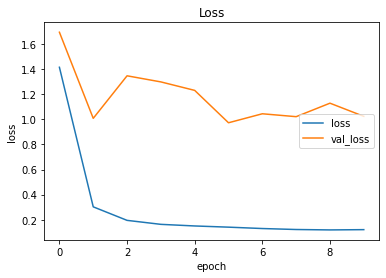

In [19]:
plt.plot(test['loss'])
plt.plot(test['val_loss'])
plt.title('Loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='center right')

plt.show()